### Trajectory analysis of Myocardial Infarction using PILOT

<div class="alert alert-block alert-info">
<b>PILOT</b>

Welcome to the PILOT Package Tutorial for scRNA Data!

Here we show the whole process for applying PILOT to scRNA data using Myocardial Infarction scRNA Data, you can download the Anndata (h5ad) file from [here](https://costalab.ukaachen.de/open_data/PILOT/myocardial_infarction.h5ad).

</div>

In [1]:
import PILOT as pl
import scanpy as sc

##### Reading Anndata

In [2]:
adata=sc.read_h5ad('Datasets/myocardial_infarction.h5ad')

###### Loading the required information and computing the Wasserstein distance:
<div class="alert alert-block alert-info"> In order to work with PILOT, ensure that your Anndata object is loaded and contains the required information.
    
Use the following parameters to configure PILOT for your analysis (Setting Parameters):
    
adata: Pass your loaded Anndata object to PILOT.
    
emb_matrix: Provide the name of the variable in the obsm level that holds the dimension reduction (PCA representation).
    
clusters_col: Specify the name of the column in the observation level of your Anndata that corresponds to cell types or clusters.
    
sample_col: Indicate the column name in the observation level of your Anndata that contains information about samples or patients.
    
status: Provide the column name that represents the status or disease (e.g., "control" or "case").
       
</div>

In [3]:
pl.tl.wasserstein_distance(adata,emb_matrix='PCA',
clusters_col='cell_subtype',sample_col='sampleID',status='Status')

##### Ploting the Cost matrix and the Wasserstein distance:
<div class="alert alert-block alert-info"> 
 Here we show the heatmaps of Cost matrix (cells) and Wasserstein distance (samples).      
</div>

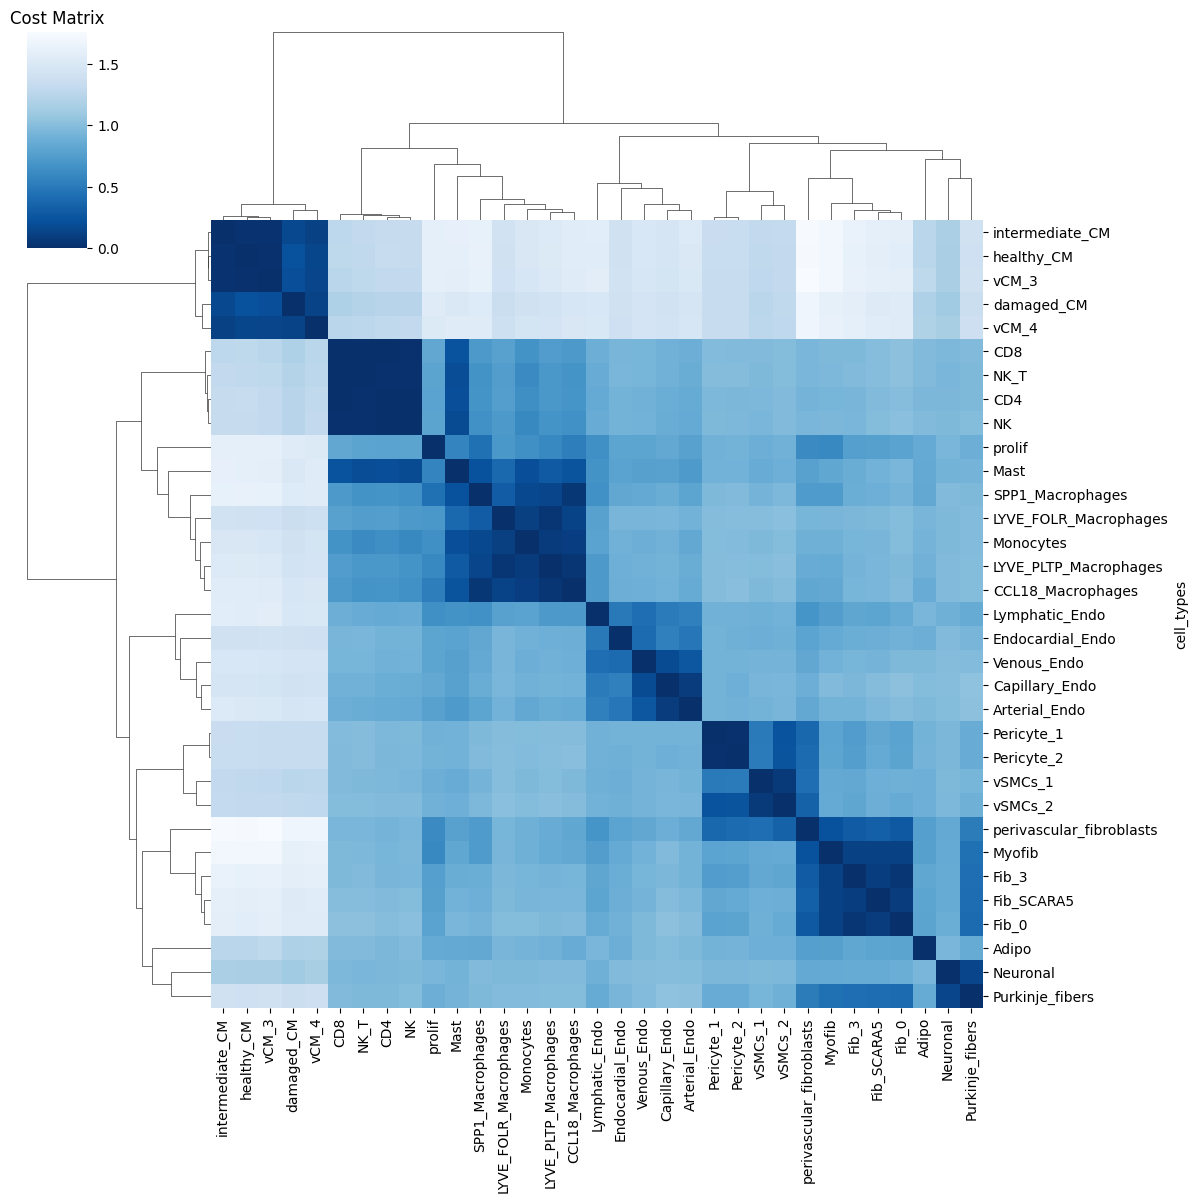

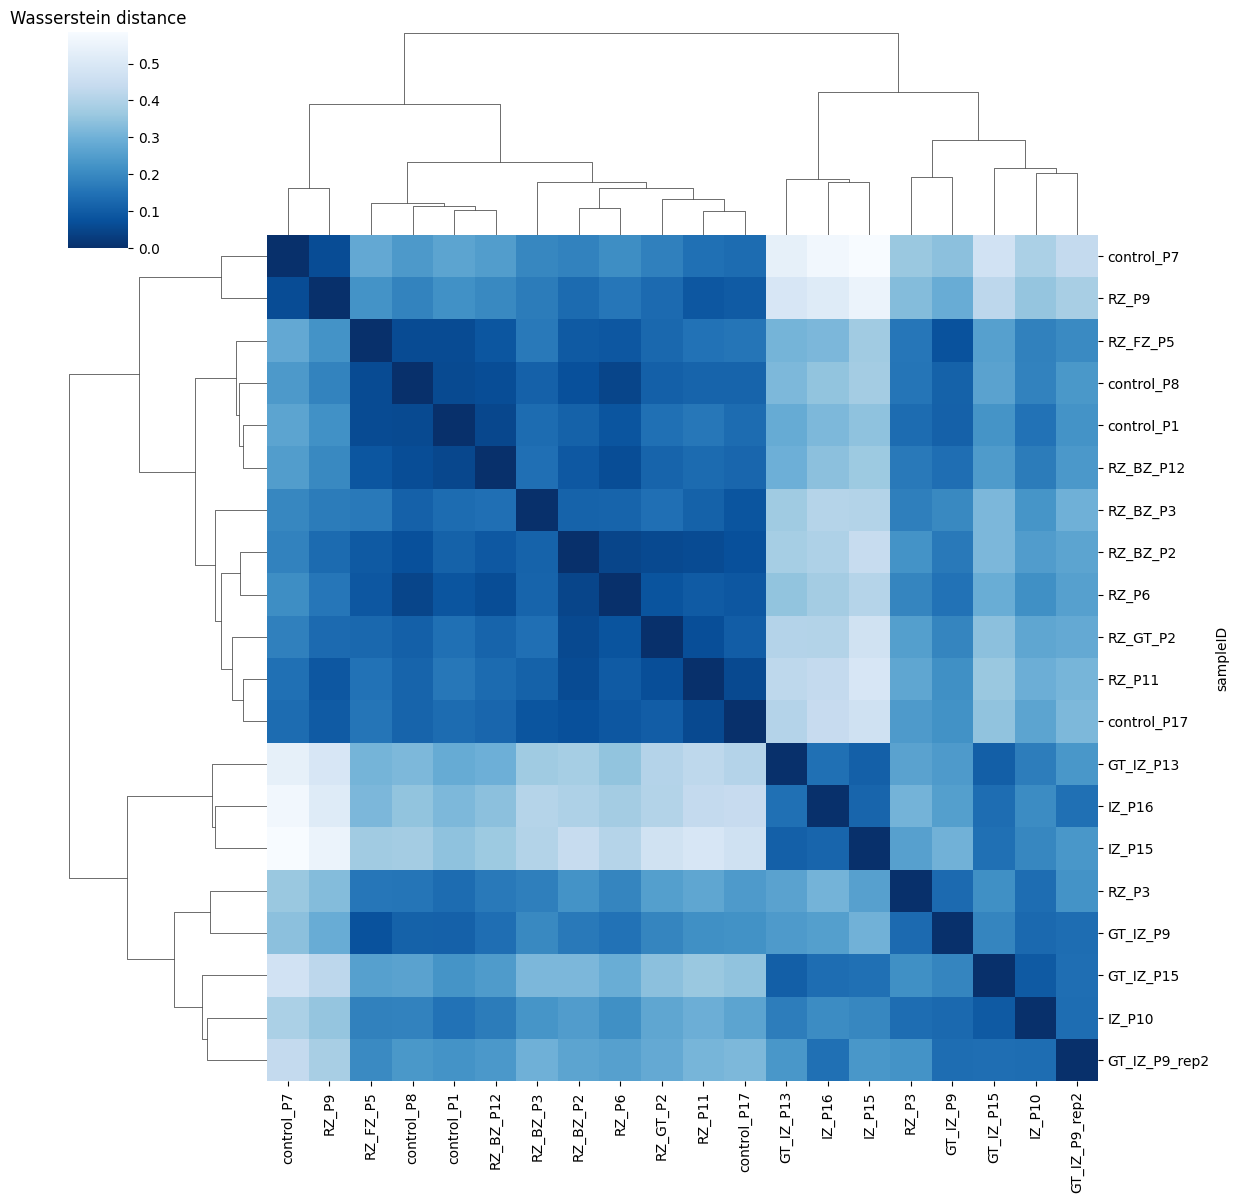

In [4]:
pl.pl.heatmaps(adata)

##### Trajectory:
<div class="alert alert-block alert-info"> 
 Here we show the Diffusion map of Wasserstein distance.
</div>

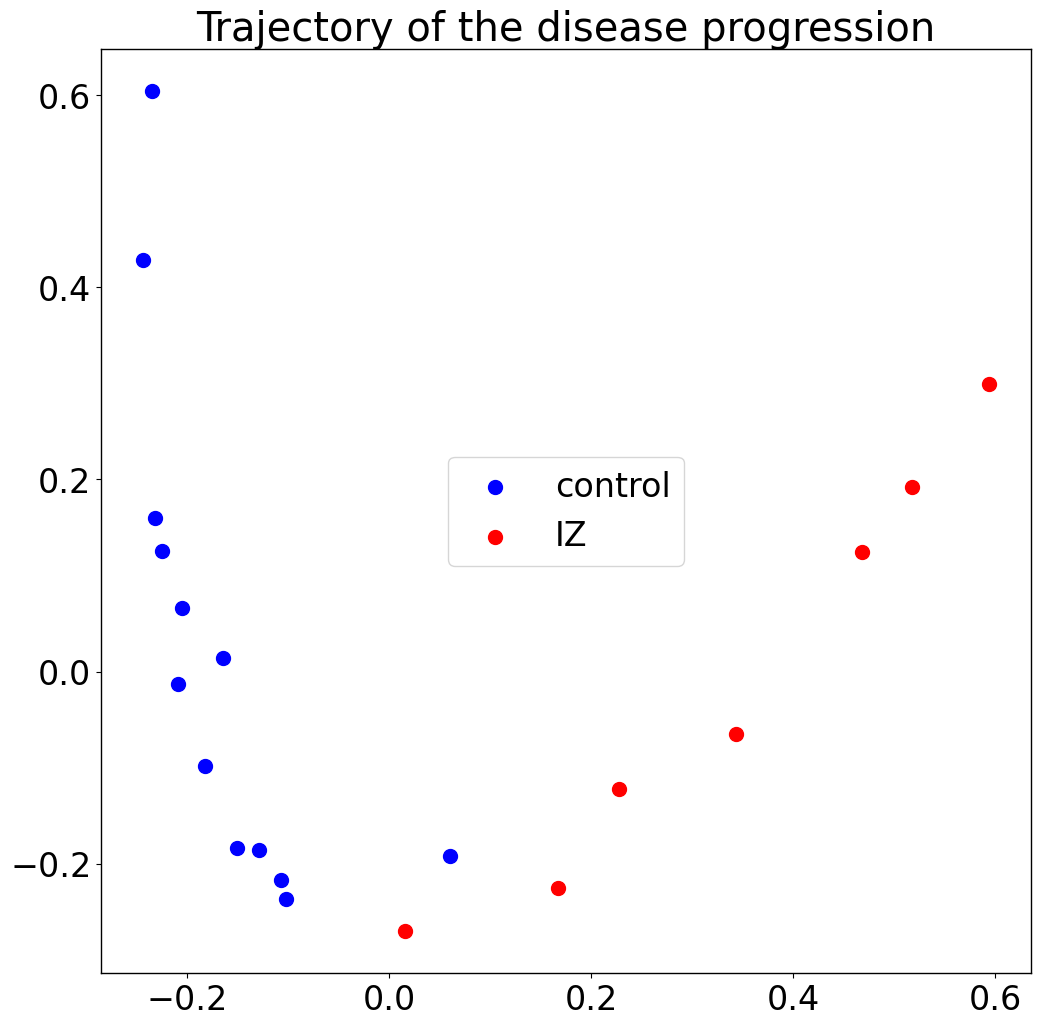

In [5]:
pl.pl.trajectory(adata,colors=['Blue','red'])

#####  Fit a principal graph:
<div class="alert alert-block alert-info"> 
Utilizing the EIPLGraph, we sketch the foundational structure of the trajectory. The source_node bears significance as it dictates where the sample ranking begins. If you have a clear starting point in mind, such as control samples, you can designate it as the source node. This method enables us to rank samples using a disease progression score (t = t1, ..., tn), where tl represents the ranking of the nth sample
</div>


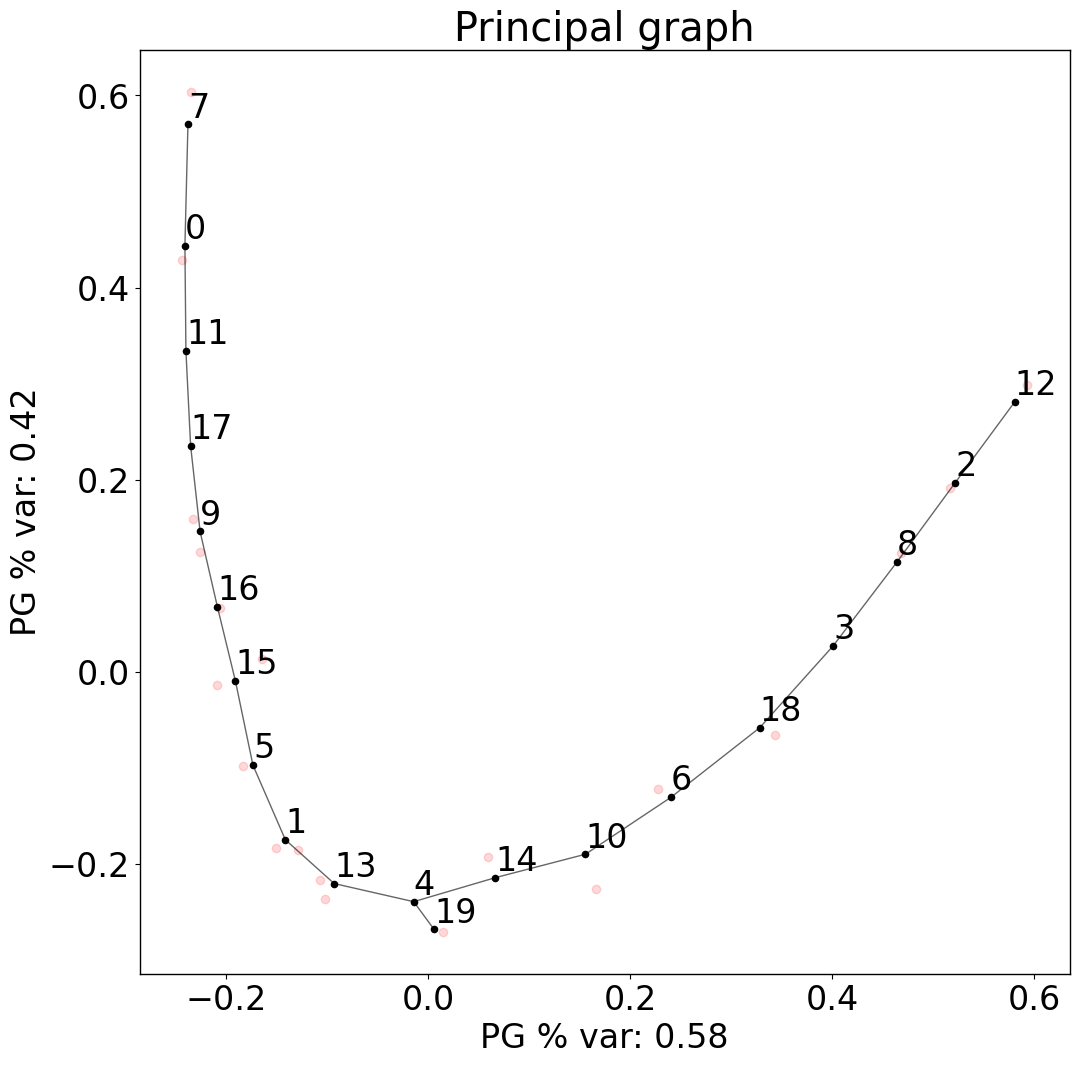

In [6]:
pl.pl.fit_pricipla_graph(adata,source_node=7)

#####  Cell-type importance:
<div class="alert alert-block alert-info"> 
Here we get the critical cells that are changing over the disease progression(sorted samples based on the trajectory of PILOT with EIPLGraph).
</div>

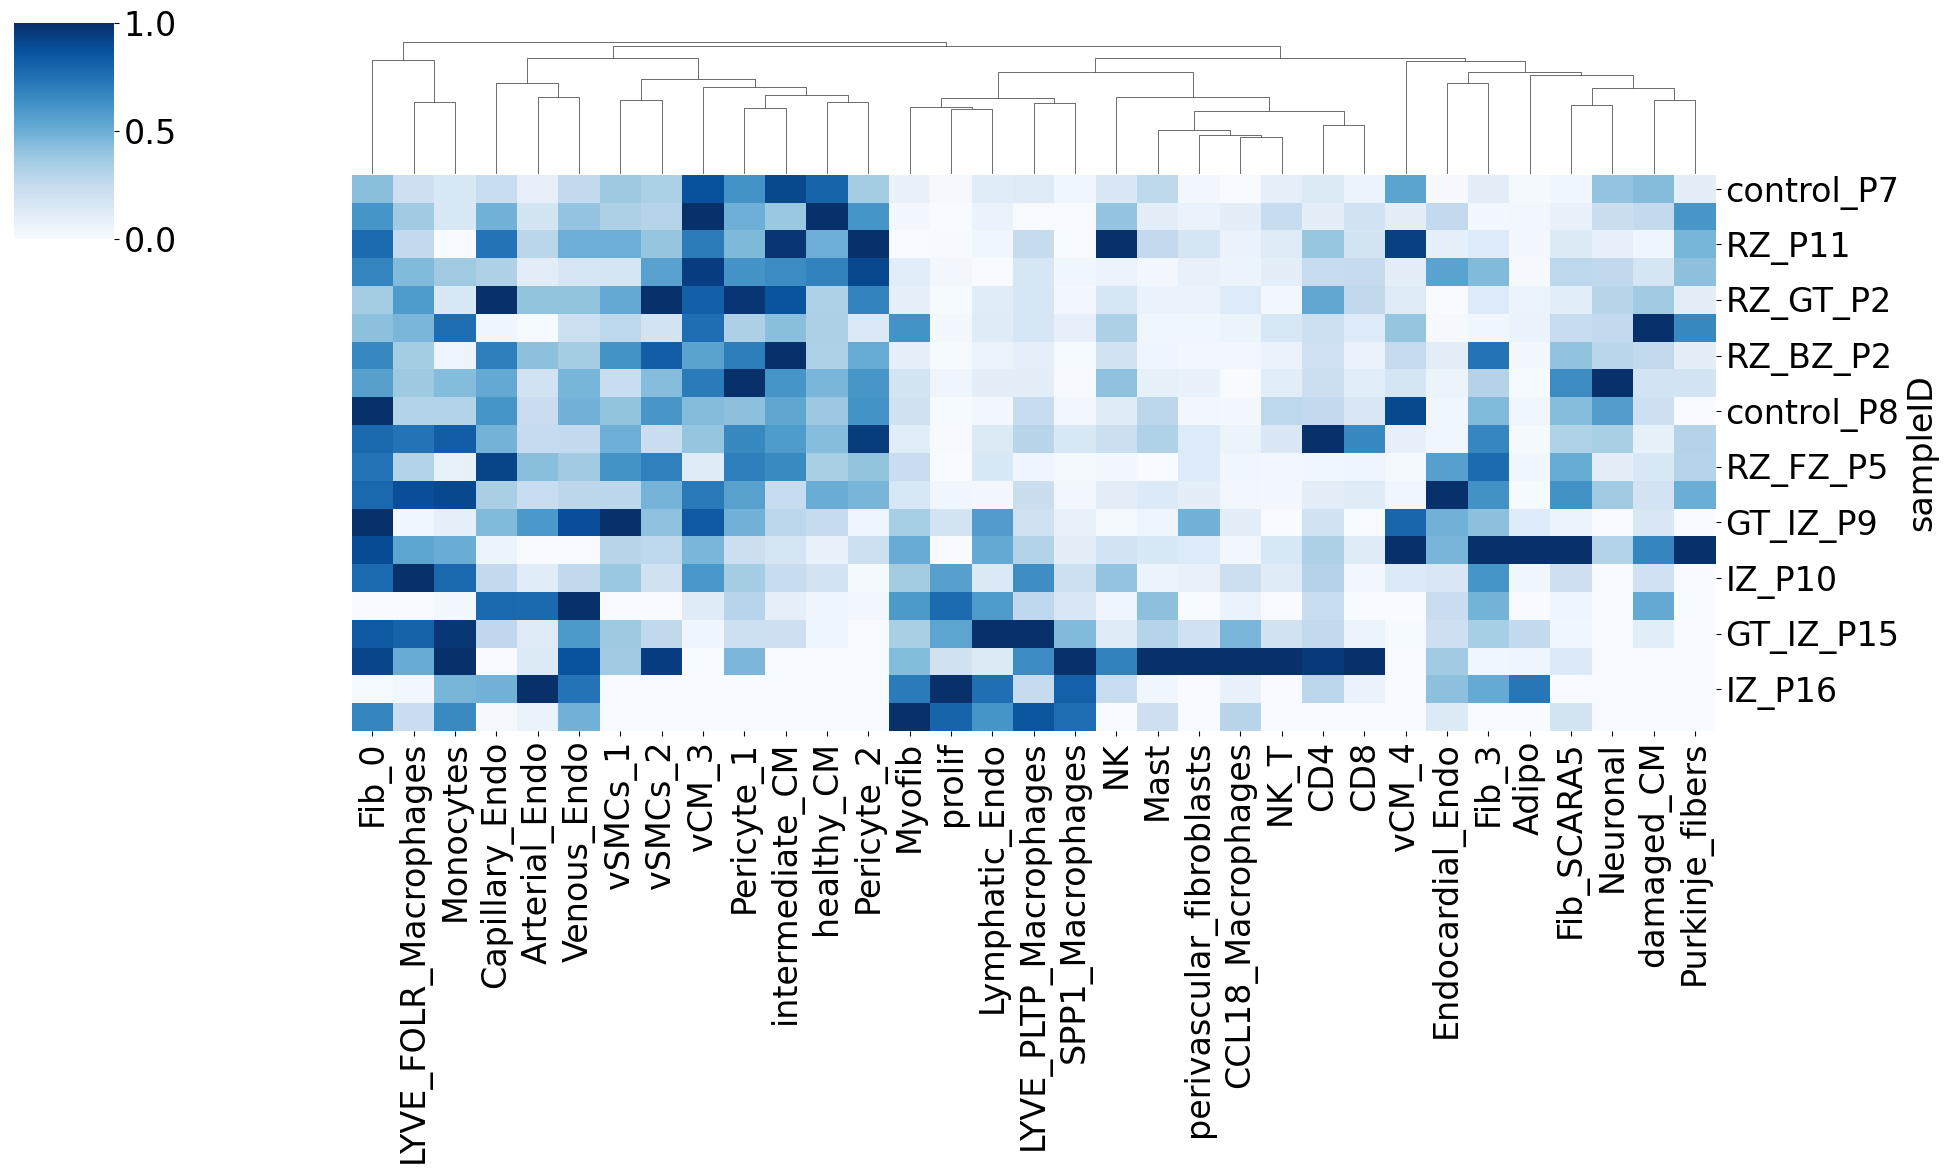

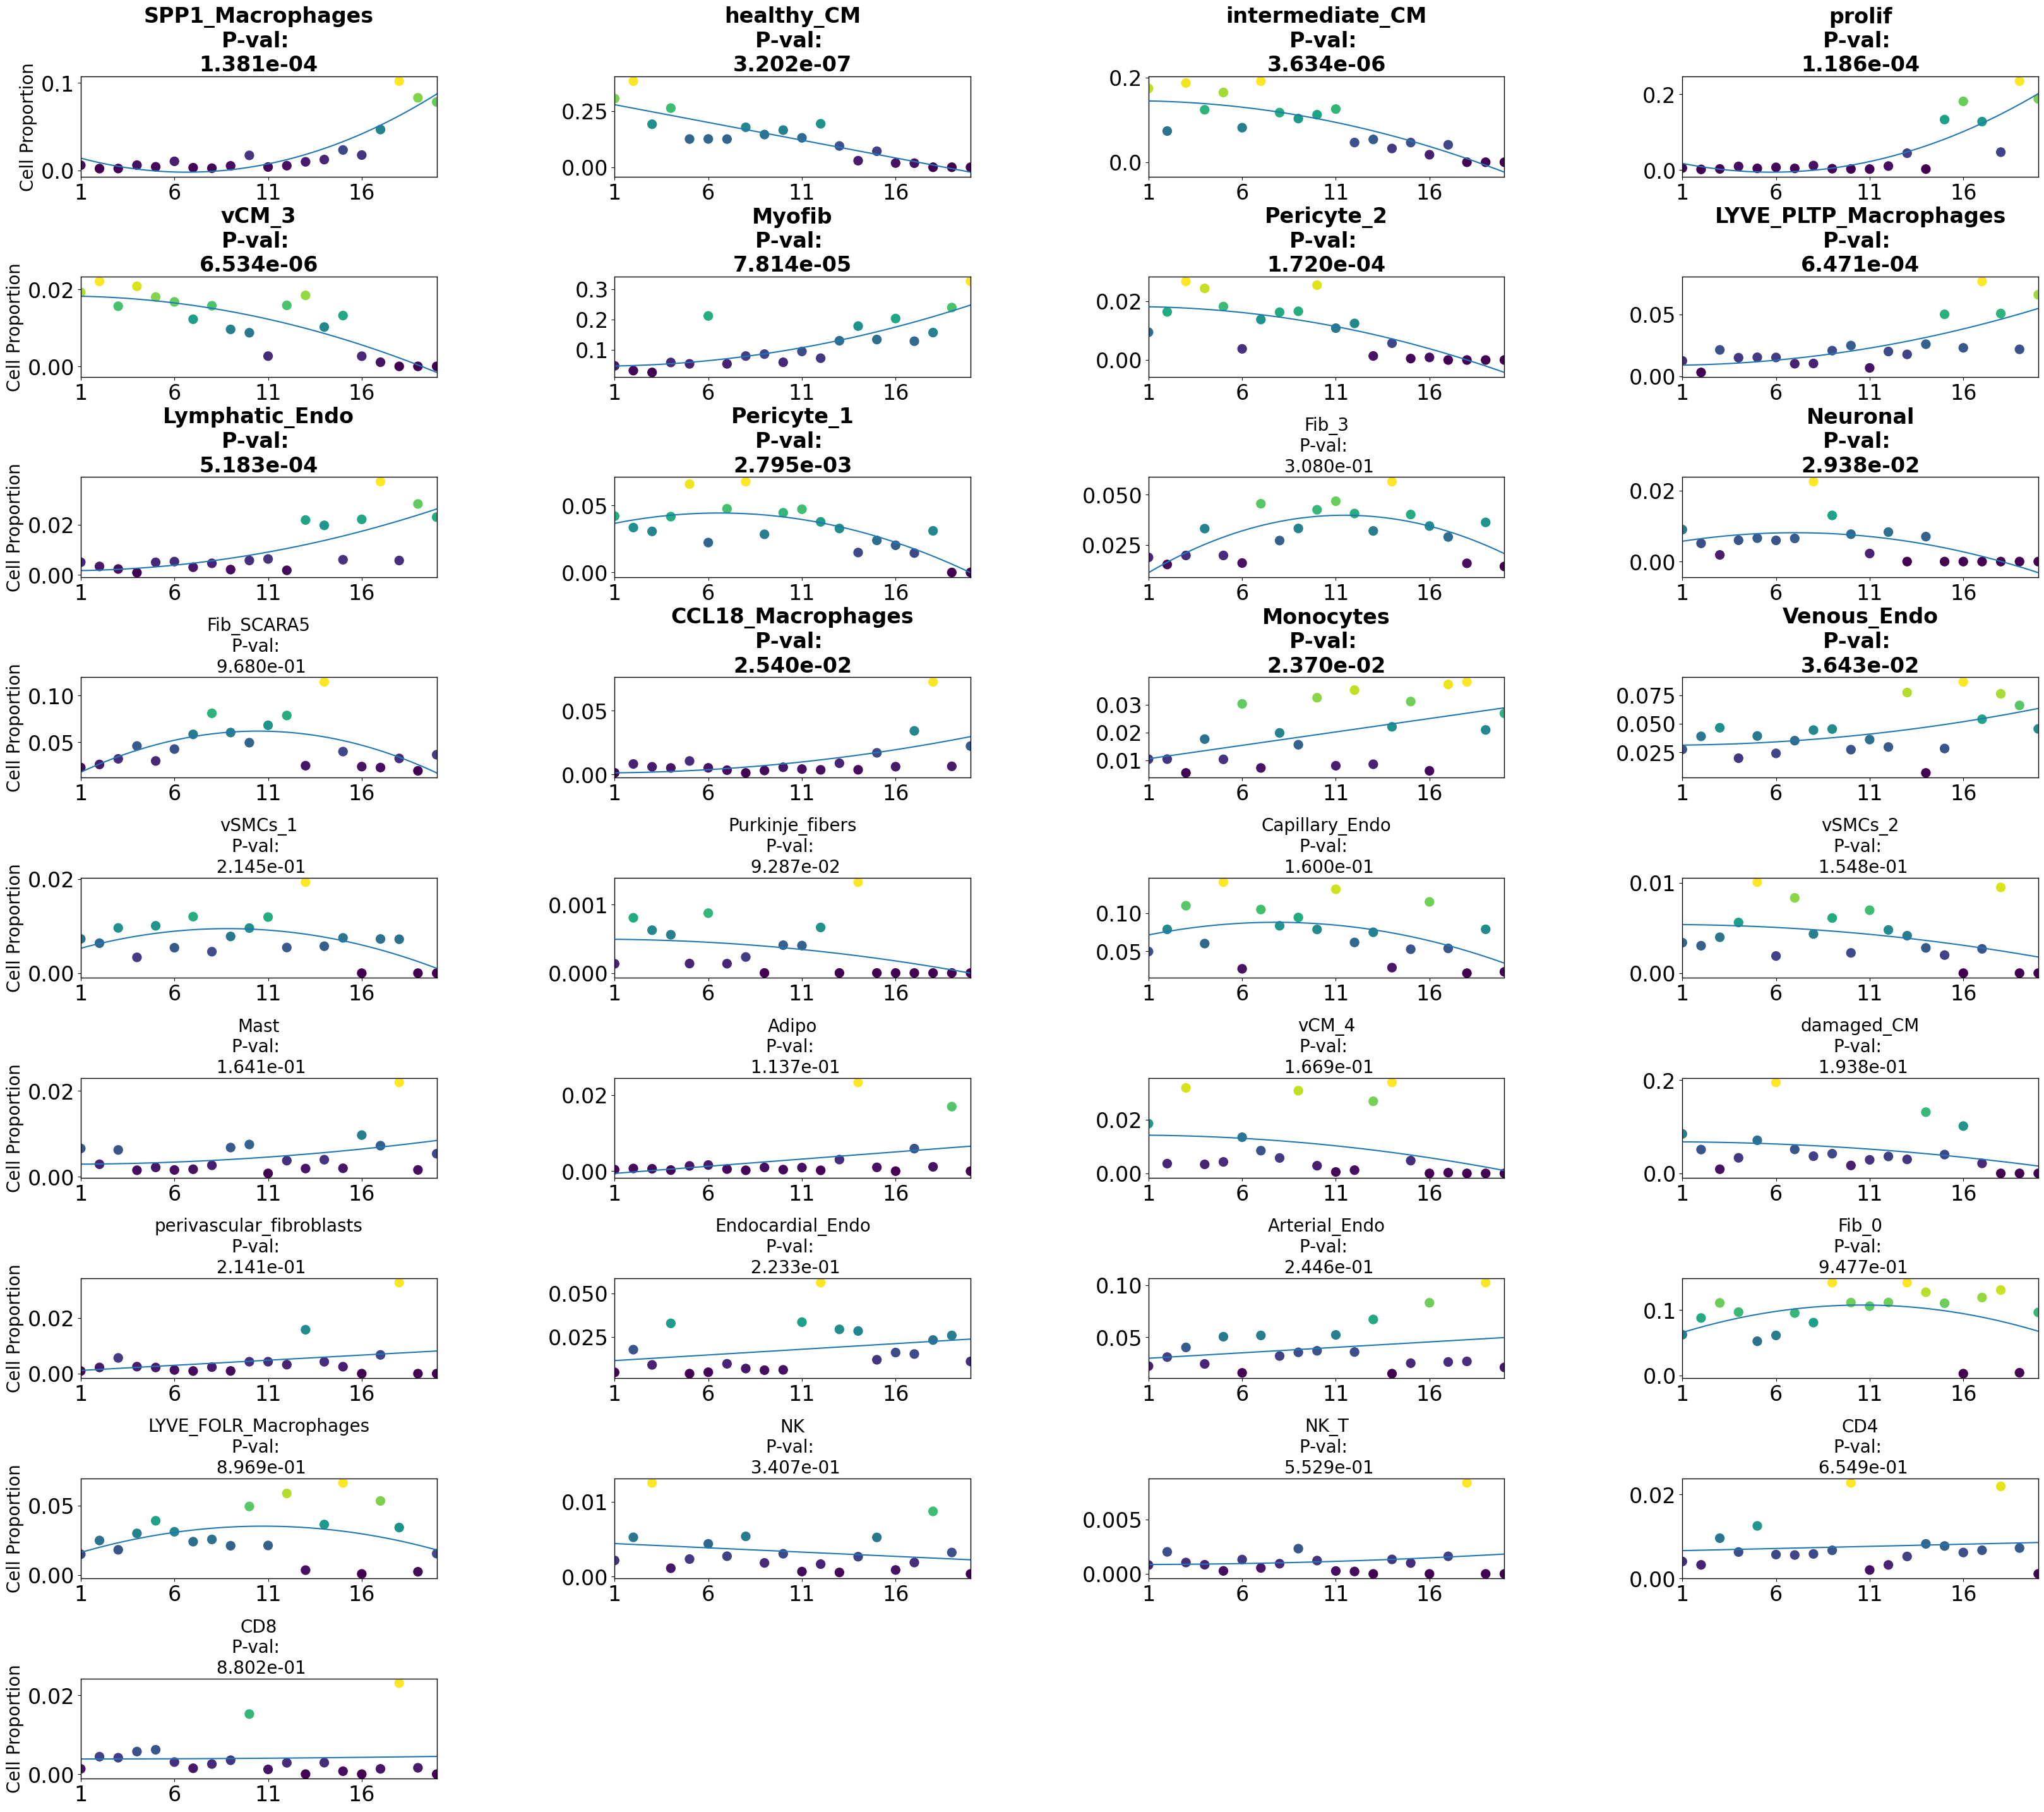

In [7]:
pl.tl.cell_importance(adata)

##### Applyin PILOT for finding Markers

##### Gene selection:
<div class="alert alert-block alert-info"> 
In this step, we find marker genes that are changed specifically over the disease progression (order of Trajectory from Control to IZ) per specific cell. In other words, we uncover genes with different patterns.You need to reproduce whole markers for cells by running the following code. After running the code, you can  see a folder named 'Markers' that for each cell there is a folder inside that includes 'Whole_expressions.csv'. 
Whole_expressions file covers the found genes and their statistics.    
Please be patient for this part, it takes time for whole cells. Here we find the genes for 'Healthy_CM' cell type as an example. You should run it for the whole group of your cell types to find the markers for the next step.
    
* You need to set names of columns that show cell_types/clusters and Samples/Patinets in your object.
</div>

Name of Cell type : healthy_CM
sparsity:0.6932279564364608
For this cell_type, p-value of  3206 genes are statistically significant.
           Expression pattern  count
4    linear up quadratic down   1134
2    linear down quadratic up    758
0                 linear down    581
3                   linear up    347
6              quadratic down    216
7                quadratic up    164
1  linear down quadratic down      5
5      linear up quadratic up      1
data saved successfully


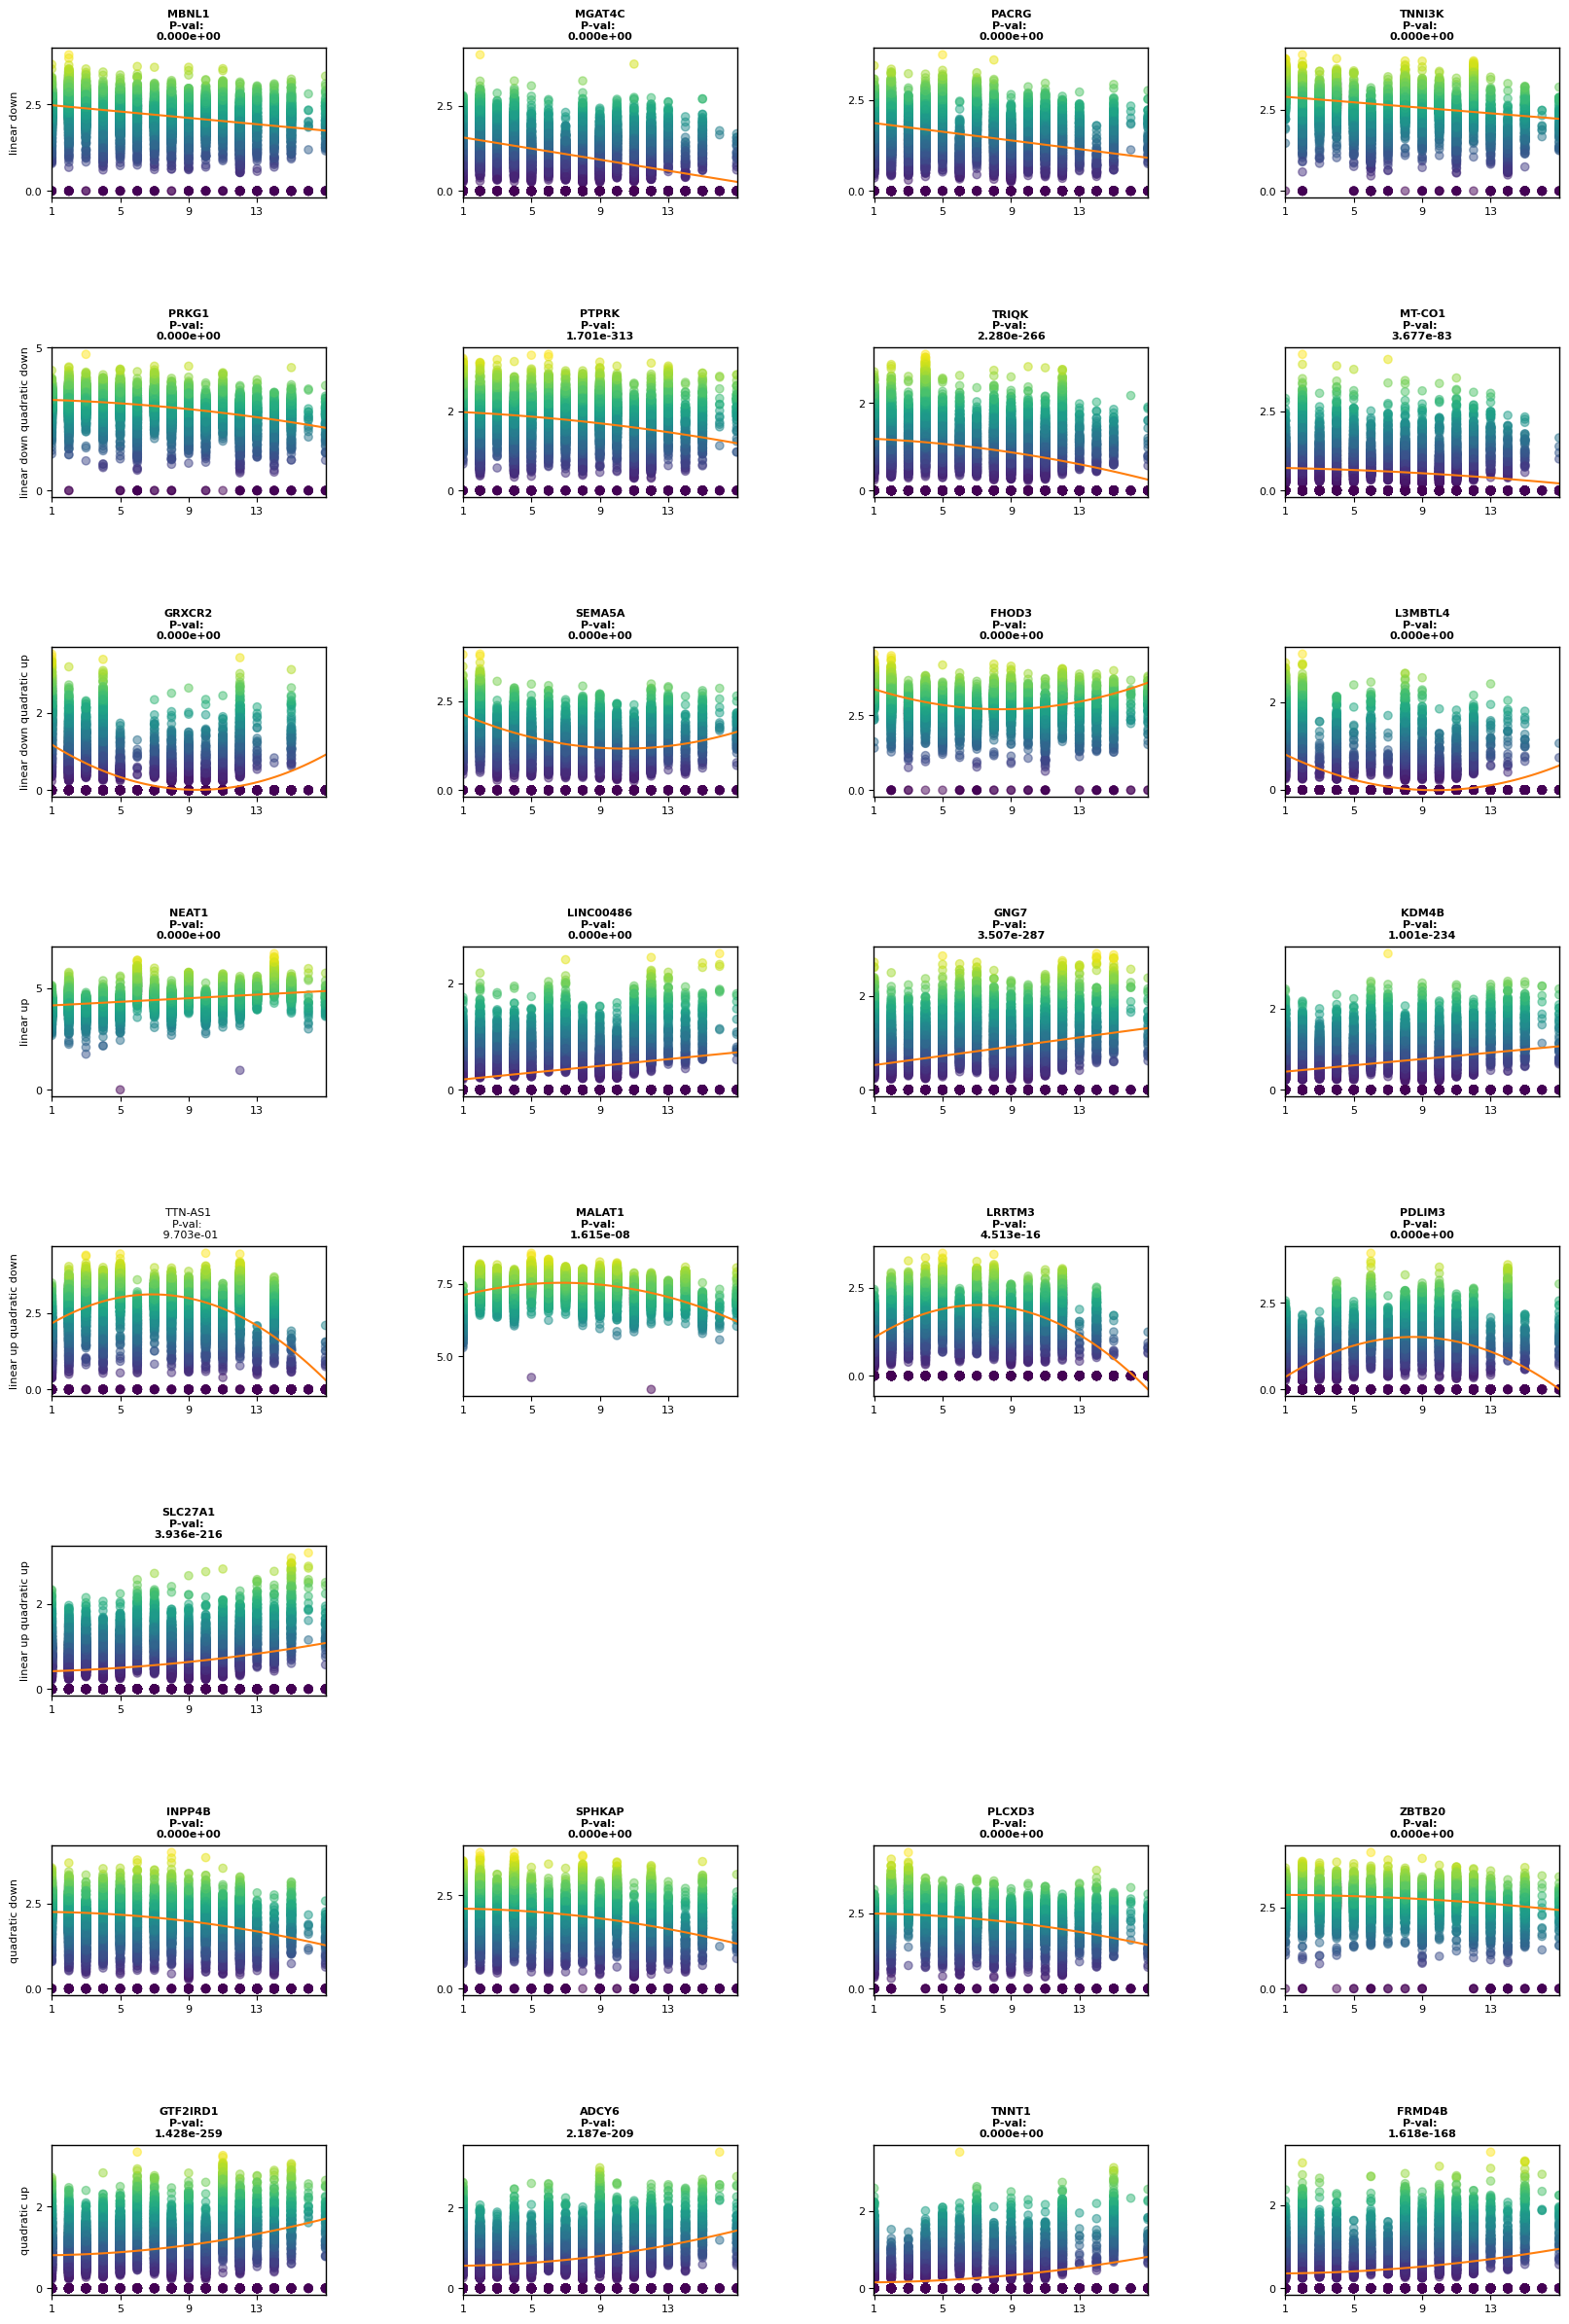

In [10]:
pl.tl.genes_importance(adata,name_cell=adata.uns['cellnames'][1],sample_col='sampleID',col_cell='cell_subtype')

##### Gene Cluster Differentiation:
<div class="alert alert-block alert-info"> 
In this stage, we deploy the Gene_Cluster_Differentiation function to unveil gene patterns unique to each cell type compared to others. Before diving in, complete the preceding steps for all cell types.

The code snippet below emphasizes 'healthy CM' and 'Myofib' cells, spotlighting their distinct marker gene patterns. You can customize this for your focus or explore all cells.

The "number_genes" parameter governs the gene count per pattern (linear, quadratic, etc.).

PILOT then extracts genes from selected cell types and documents patterns in 'gene_clusters_stats_extend.' This file showcases markers of your selected cells like 'healthy CM' and 'Myofib' across diverse cell types, with statistics. 
    
Check the "plots_gene_cluster_differentiation" folder for an array of plots that highlight the pattern of selected markers in specific cells (shown as orange lines) compared to other cell types (represented by grey lines). 
</div>

In [12]:
pl.tl.gene_cluster_differentiation(cellnames=['healthy_CM','Myofib'],number_genes=70)

##### Exploring the results for a specific cell type :
<div class="alert alert-block alert-info"> 
If you have specific genes of interest or prefer to select certain genes according to your preferences, you can proceed with this phase.
    
    
After completing the previous steps, you can review the 'gene_clusters_stats_extend' file. To assist you in exploring the results, we offer a function called 'results_gene_cluster_differentiation'. This function enables you to sort the results according to your preferences. For instance, if you're interested in obtaining genes related to 'Myofib', you can use the function to sort the results based on attributes like Fold Change and p-values. This allows you to gain insights into the most relevant genes for your specific analysis. 
    

</div>

In [13]:
pl.tl.results_gene_cluster_differentiation(cluster_name='Myofib').head(15)

gene cluster     waldStat  df         pvalue        FC  \
2832   GXYLT2  Myofib    16.558622   3   8.709144e-04  2.000205   
2529      FN1  Myofib    13.290116   3   4.049427e-03  1.573680   
1372   COL1A2  Myofib    17.891454   3   4.631138e-04  1.327753   
1392   COL3A1  Myofib    14.131029   3   2.732118e-03  1.240454   
2642     GAS7  Myofib  1120.683802   3  1.184877e-242  1.086644   
6053  SLC20A1  Myofib     2.975838   3   3.953656e-01  1.083983   
1437   COL6A3  Myofib    95.945158   3   1.156600e-20  1.069156   
1710      DCN  Myofib    27.320866   3   5.042427e-06  1.033697   
5775     RORA  Myofib  1461.764959   3   0.000000e+00  0.899459   
3783      MGP  Myofib     3.358545   3   3.395770e-01  0.871041   
4979   PKNOX2  Myofib    11.032610   3   1.155084e-02  0.855504   
7245     VCAN  Myofib     4.083920   3   2.525437e-01  0.838764   
5929   SEC24D  Myofib    22.793274   3   4.459441e-05  0.806642   
2151     EXT1  Myofib   146.307312   3   1.649235e-31  0.786136   
1359   COL1A1  Myofib     0.061405   3   9.960268e-01  0.726953   

            Expression pattern     fit-pvalue  fit-rsquared  fit-mod-rsquared  
2832  linear up quadratic down   2.402171e-85      0.034837          0.537920  
2529  linear down quadratic up  2.947389e-188      0.099780          0.633774  
1372  linear down quadratic up   0.000000e+00      0.231484          0.655032  
1392  linear down quadratic up   0.000000e+00      0.275497          0.665616  
2642  linear up quadratic down  1.873033e-107      0.082635          0.570704  
6053  linear down quadratic up   5.900150e-79      0.022840          0.549634  
1437  linear down quadratic up  3.514298e-172      0.085799          0.608543  
1710  linear up quadratic down  1.866152e-284      0.118391          0.588602  
5775            quadratic down  7.232834e-174      0.029289          0.587234  
3783            quadratic down  1.327779e-225      0.093052          0.571374  
4979            quadratic down  1.039404e-117      0.040874          0.544122  
7245  linear down quadratic up  1.761922e-164      0.066772          0.571981  
5929  linear down quadratic up   6.604860e-64      0.024282          0.522700  
2151  linear up quadratic down   3.159831e-35      0.016228          0.555757  
1359  linear down quadratic up   0.000000e+00      0.311453          0.680489

#####  Myofib cells

<div class="alert alert-block alert-info"> 
In this step, we have chosen specific genes mentioned in the paper ('DCN','EXT1','COL1A2') to observe their expression patterns in the context of Myofib in comparison to other cell types. You can look at the plots (for these genes) in the "plots_gene_cluster_differentiation" folder. 
    
    
* Please note that the upcoming step will update the associated "plots_gene_cluster_differentiation" folder. It's recommended to keep a backup of these files if you want them.
 </div>

<Figure size 640x480 with 0 Axes>

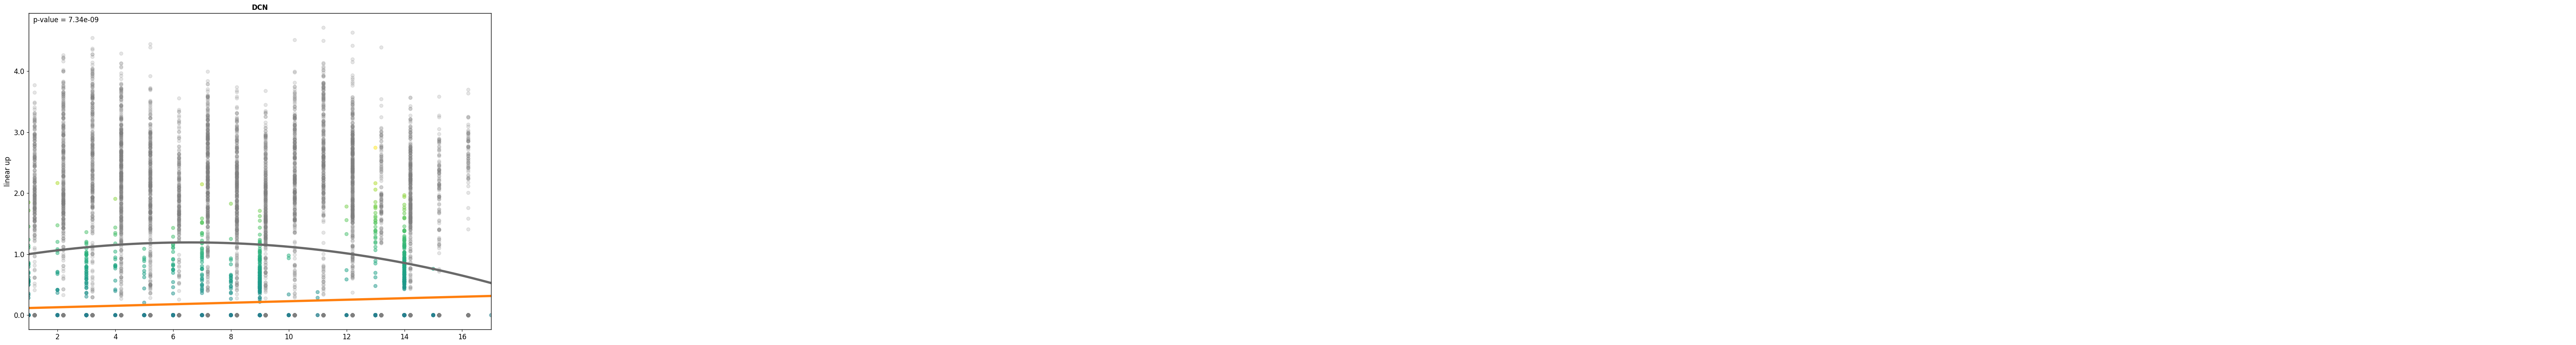

<Figure size 640x480 with 0 Axes>

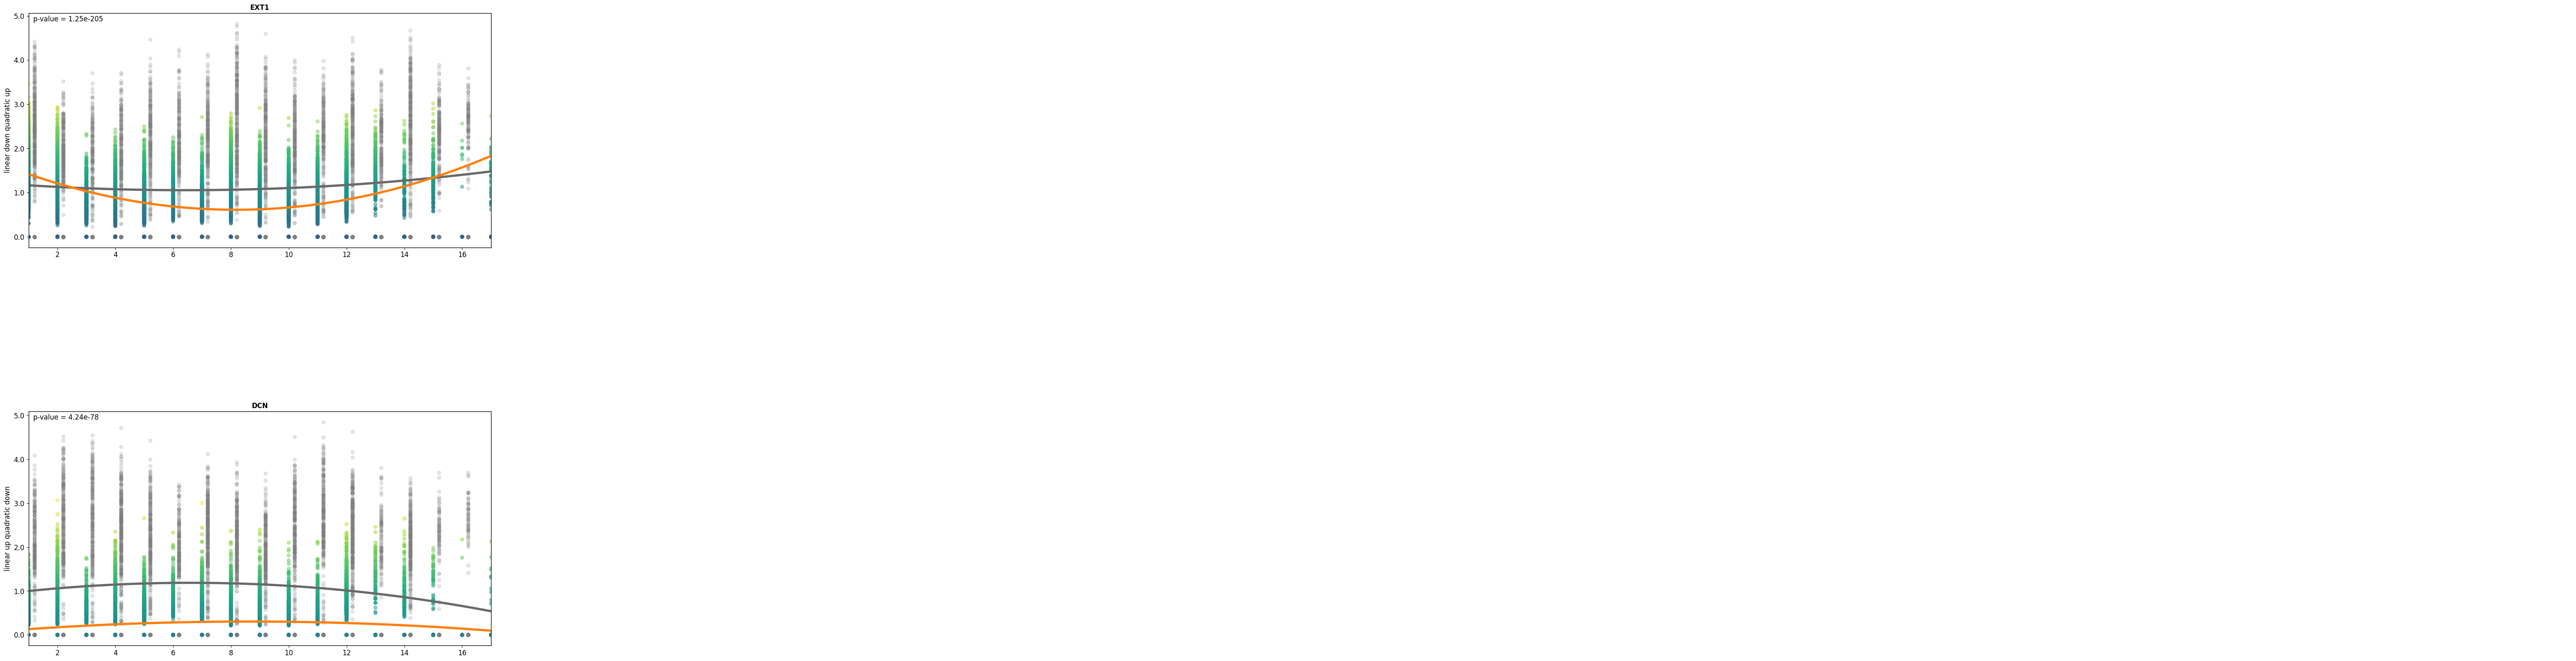

<Figure size 640x480 with 0 Axes>

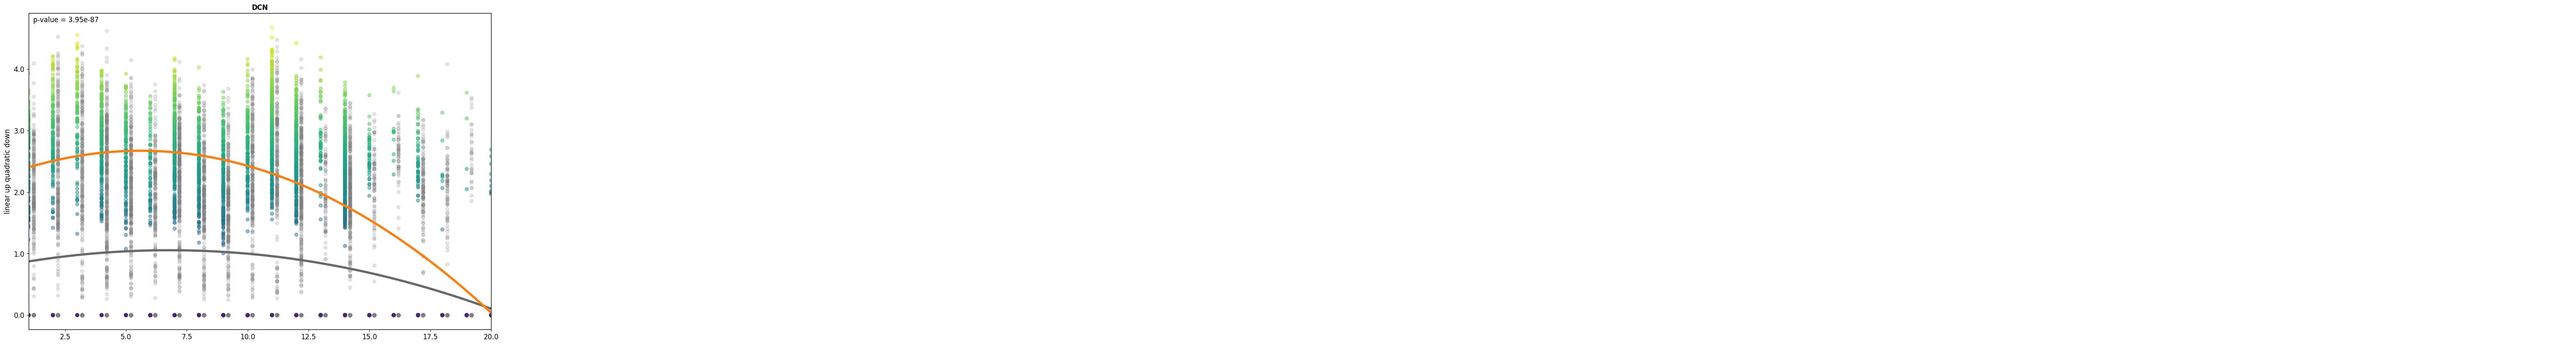

<Figure size 640x480 with 0 Axes>

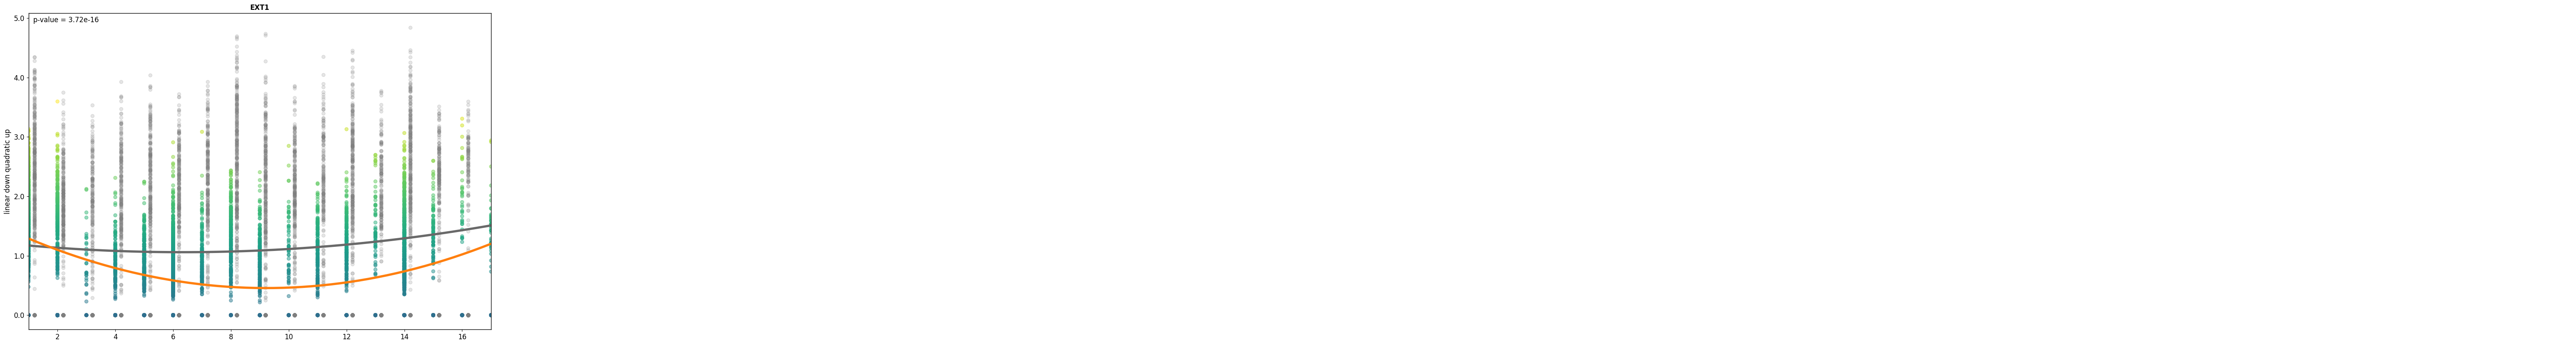

<Figure size 640x480 with 0 Axes>

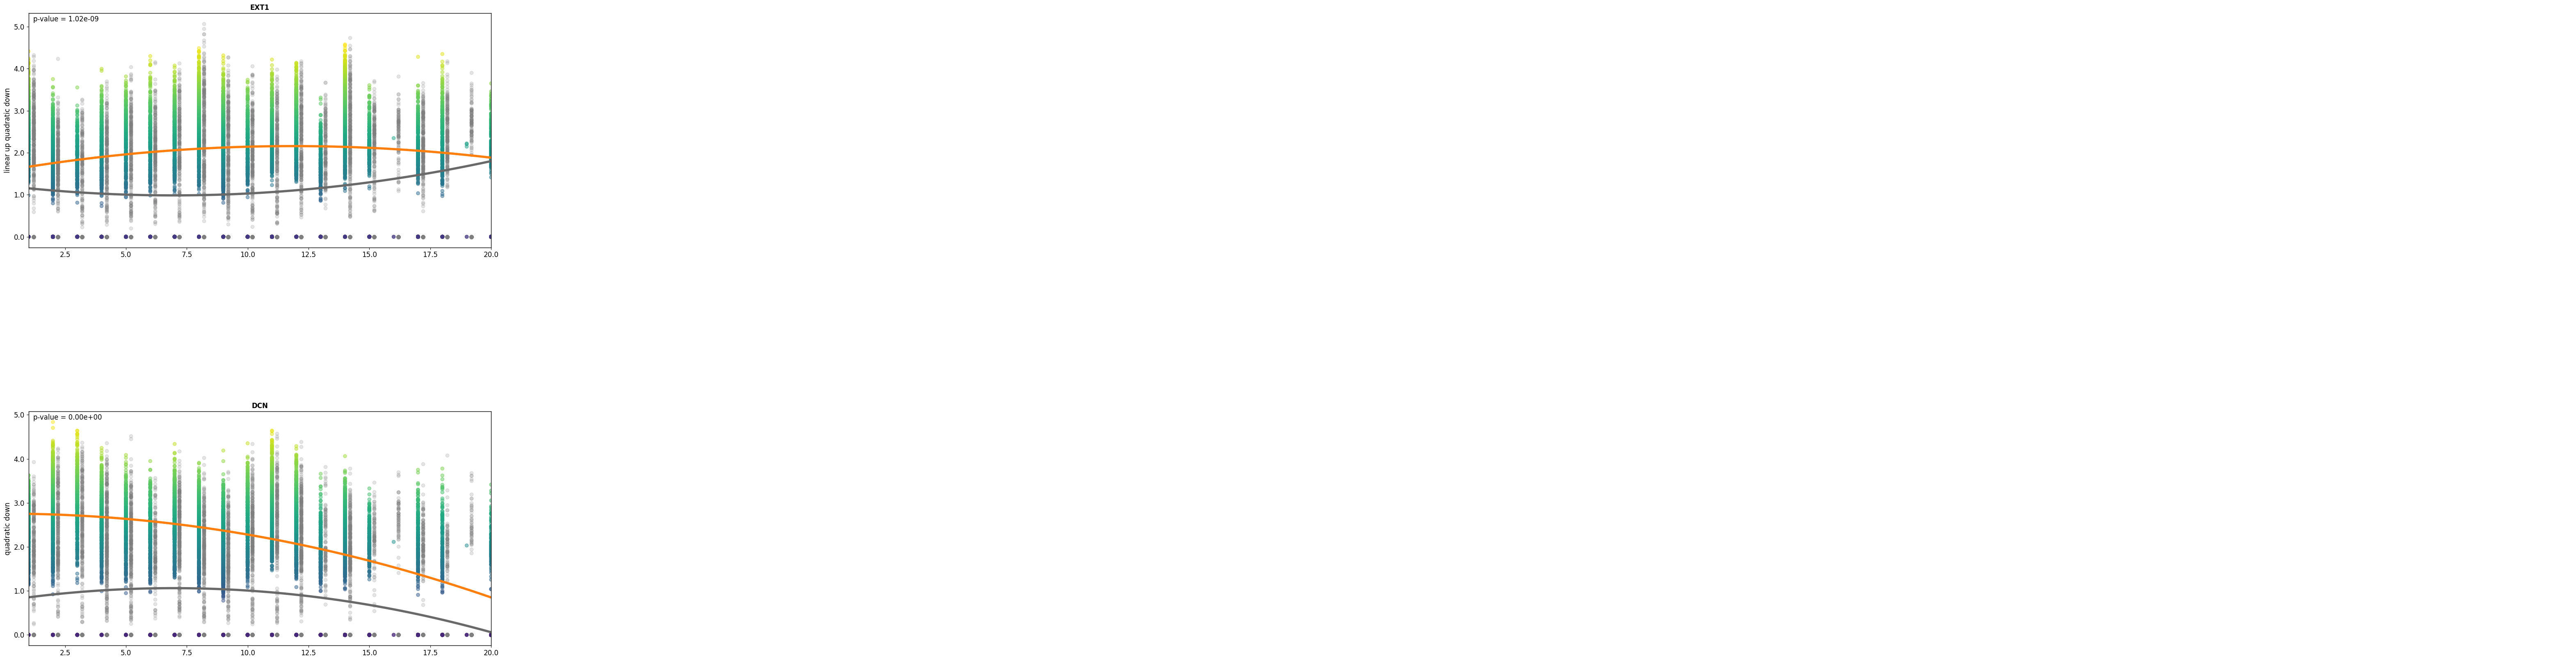

<Figure size 640x480 with 0 Axes>

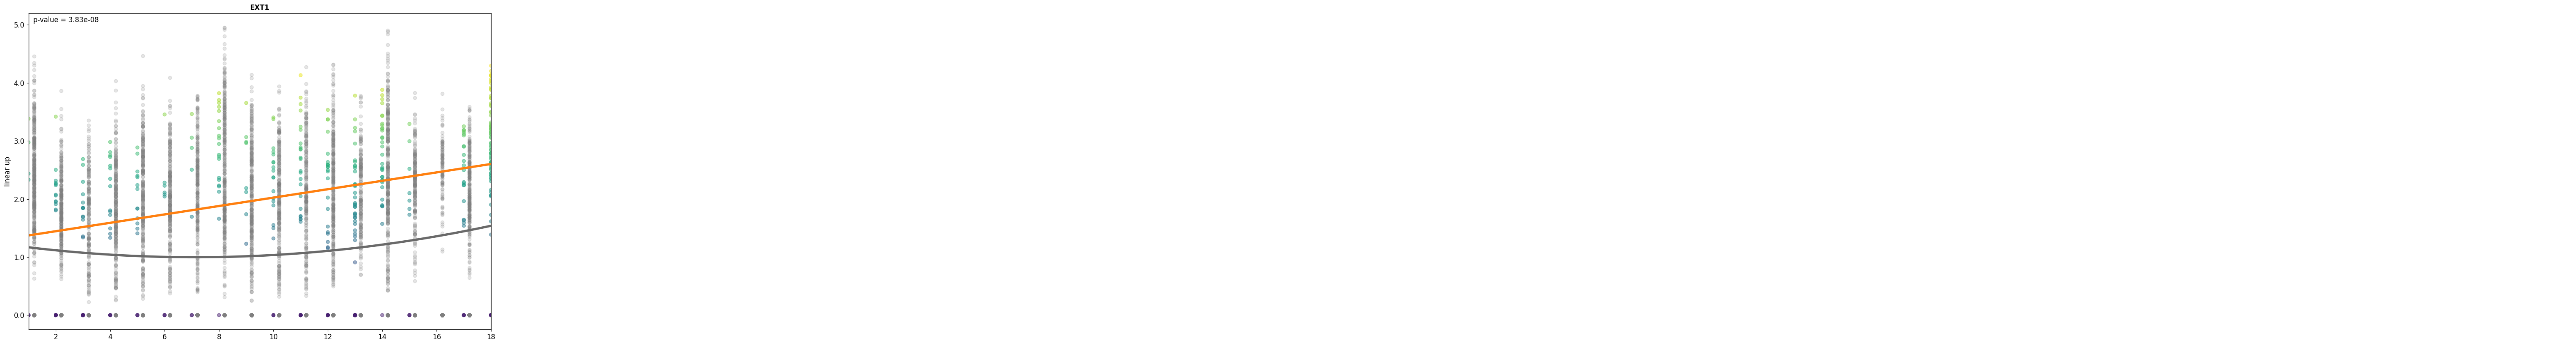

<Figure size 640x480 with 0 Axes>

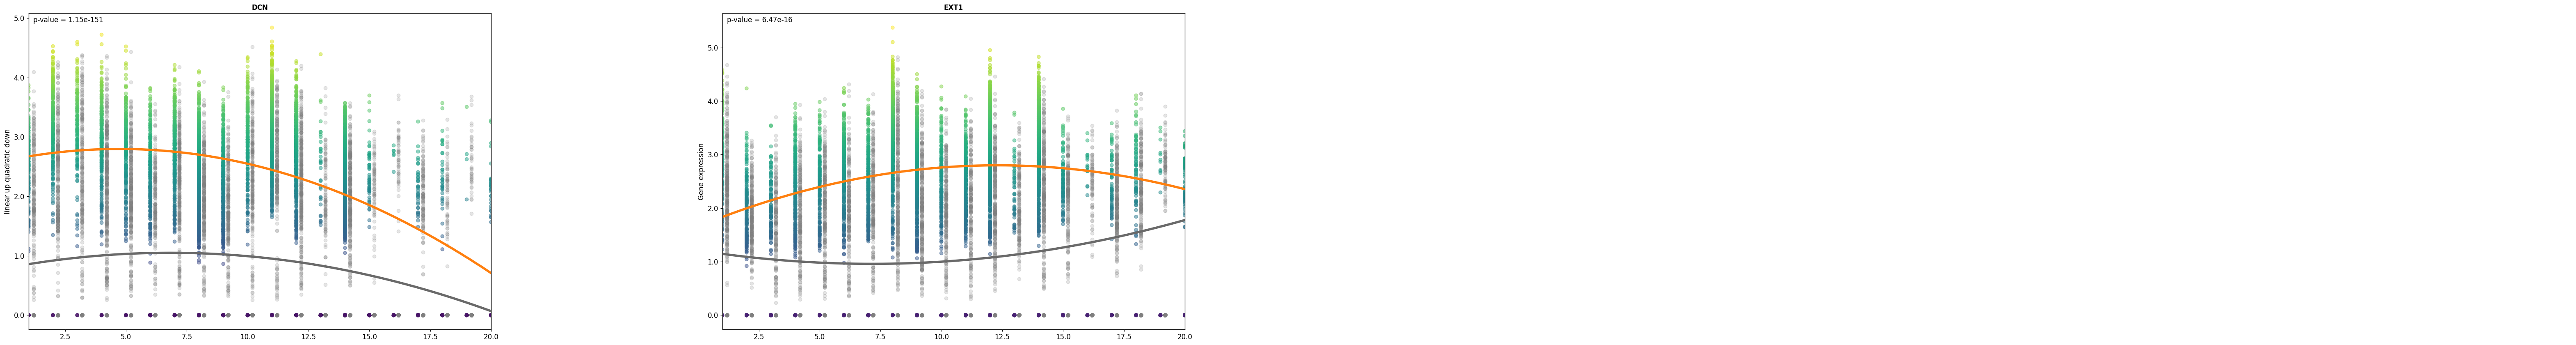

<Figure size 640x480 with 0 Axes>

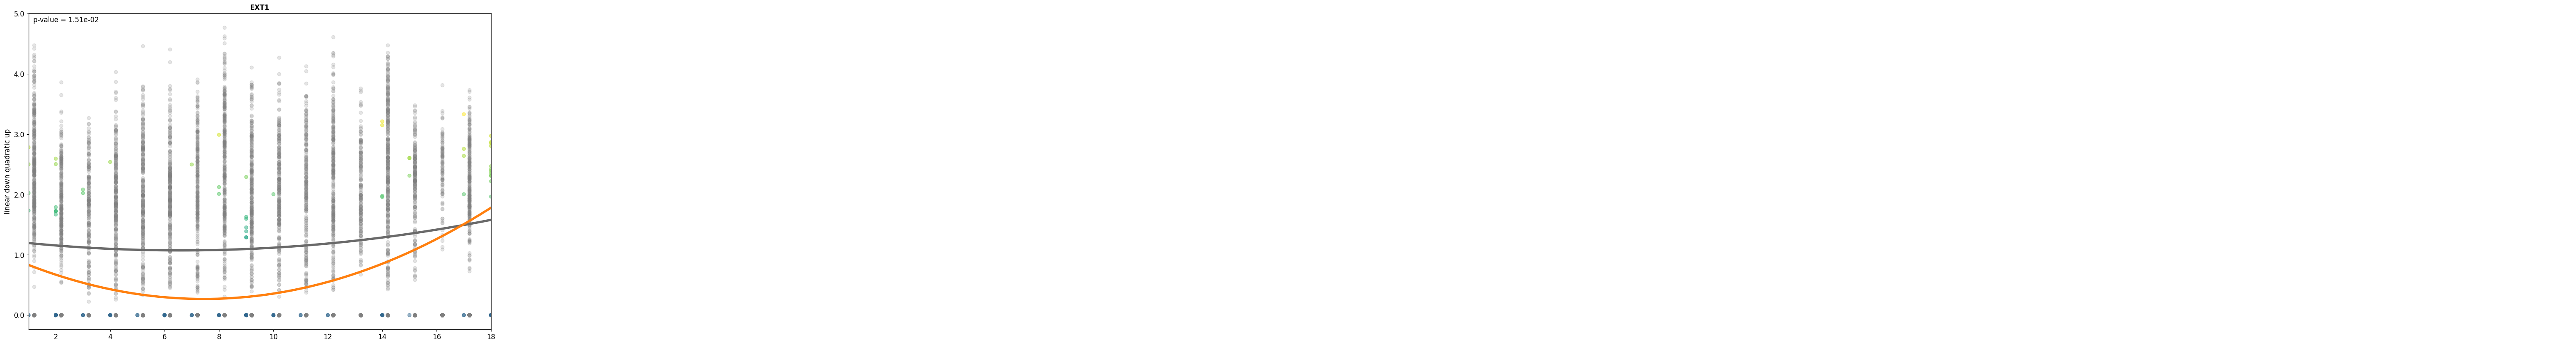

<Figure size 640x480 with 0 Axes>

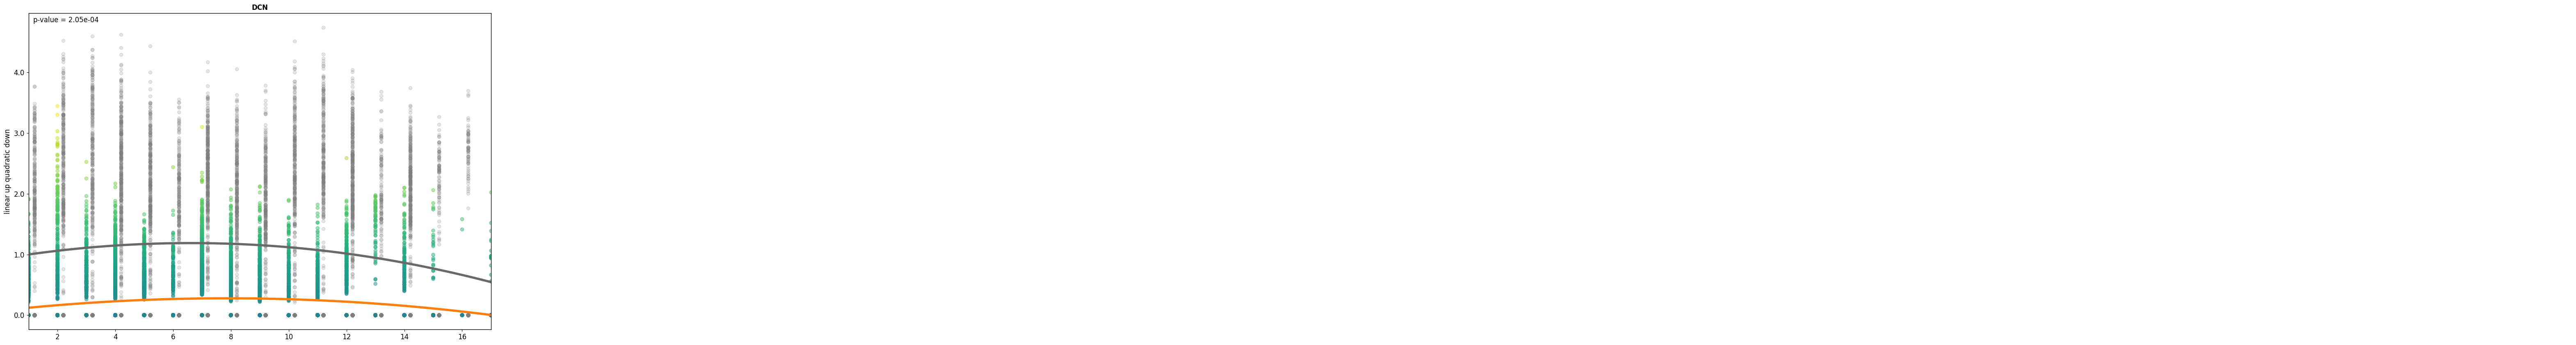

<Figure size 640x480 with 0 Axes>

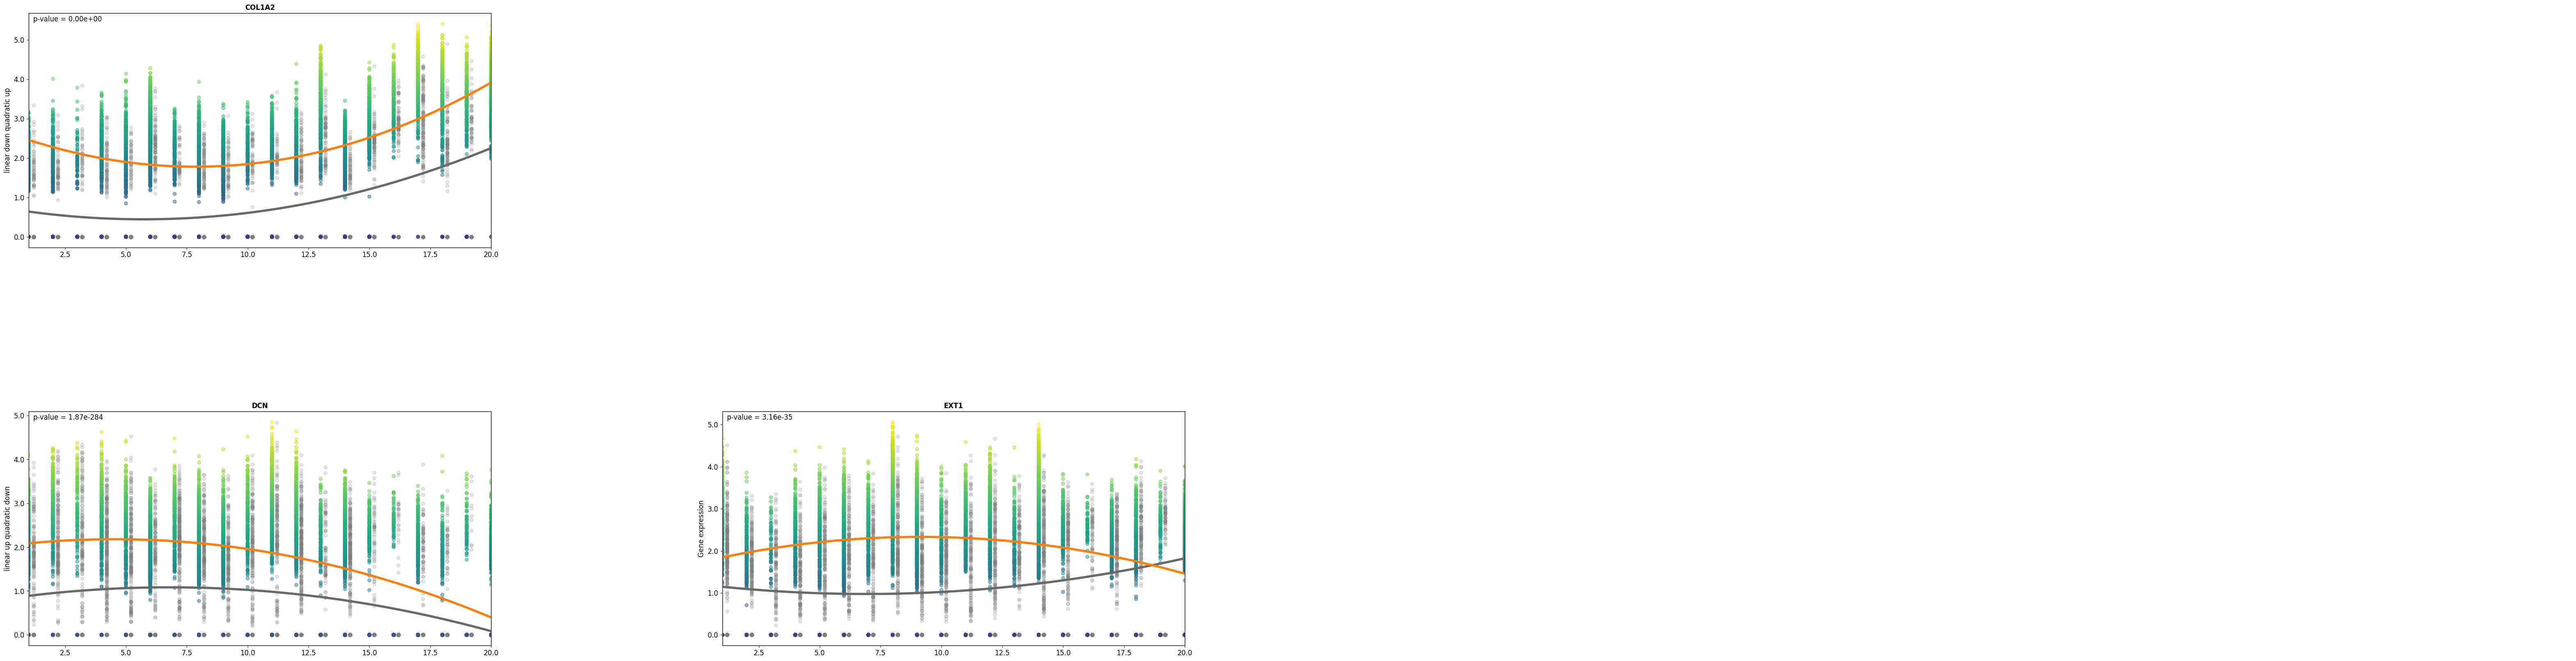

In [14]:
pl.tl.exploring_specific_genes(cluster_name='Myofib',gene_list=['DCN','EXT1','COL1A2'])